In [570]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
from parameter_setup import normalization
import time
from PIL import Image
from scipy.signal import find_peaks
from sklearn.cluster import DBSCAN
from scipy.spatial import distance

In [571]:
def load_params(data_folder):
    parameters = {}
    parameters['start_freq'] = np.load(f'./{data_folder}/parameters/start_freq.npy')
    parameters['stop_freq'] = np.load(f'./{data_folder}/parameters/stop_freq.npy')
    parameters['num_freq_step'] = np.load(f'./{data_folder}/parameters/num_freq_step.npy')
    parameters['rbw'] = np.load(f'./{data_folder}/parameters/rbw.npy')
    parameters['TxRxPairs'] = np.load(f'./{data_folder}/parameters/TxRxPairs.npy')
    parameters['freq'] = np.load(f'./{data_folder}/parameters/freq.npy')
    parameters['dist_vec'] = np.load(f'./{data_folder}/parameters/dist_vec.npy')
    parameters['AoD_vec'] = np.load(f'./{data_folder}/parameters/AoD_vec.npy')
    parameters['AoA_vec'] = np.load(f'./{data_folder}/parameters/AoA_vec.npy')
    parameters['doppler_freq'] = np.load(f'./{data_folder}/parameters/doppler_freq.npy')
    parameters['range_Nfft'] = np.load(f'./{data_folder}/parameters/range_Nfft.npy')
    parameters['angle_Nfft'] = np.load(f'./{data_folder}/parameters/angle_Nfft.npy')
    parameters['doppler_Nfft'] = np.load(f'./{data_folder}/parameters/doppler_Nfft.npy')
    parameters['x_offset_shift'] = np.load(f'./{data_folder}/parameters/x_offset_shift.npy')
    parameters['y_offset_shift'] = np.load(f'./{data_folder}/parameters/y_offset_shift.npy')
    parameters['x_ratio'] = np.load(f'./{data_folder}/parameters/x_ratio.npy')
    parameters['y_ratio'] = np.load(f'./{data_folder}/parameters/y_ratio.npy')
    parameters['ant_loc'] = np.load(f'./{data_folder}/parameters/ant_loc.npy')
    parameters['doppler_window_size'] = np.load(f'./{data_folder}/parameters/doppler_window_size.npy')
    parameters['cal_arr'] = np.load(f'./{data_folder}/parameters/cal_arr.npy')

    return parameters

In [572]:
def filter_and_cluster(matrix, threshold=0.0, n=np.inf, eps=1, min_samples=3):
    indices = np.argwhere(matrix > threshold)

    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(indices)
    labels = clustering.labels_
    unique_labels = np.unique(labels)

    cluster_sizes = [(label, sum(labels == label)) for label in unique_labels if label != -1]
    cluster_sizes.sort(key=lambda x: x[1], reverse=True)

    selected_indices = []
    for i in range(min(n, len(cluster_sizes))):
        label = cluster_sizes[i][0]
        cluster_indices = indices[labels == label]
        centroid = cluster_indices.mean(axis=0)
        selected_indices.append(cluster_indices[distance.cdist([centroid], cluster_indices).argmin()])

    return np.array(selected_indices)

In [573]:
# List all the collected data
for data in os.listdir('./collected_data/'):
    print(data)

1p_seat_1_rbw_100_06-26-2023--19-10-43
1p_seat_1_rbw_10_06-26-2023--19-09-07
1p_seat_1_rbw_300_06-26-2023--19-12-02
1p_seat_1_rbw_500_06-26-2023--19-13-17
1p_seat_1_rbw_700_06-26-2023--19-14-29
1p_seat_1_rbw_800_06-26-2023--19-15-47
1p_seat_1_with_cf_1b_seat_2_rbw_10_06-28-2023--16-09-36
1p_seat_1_with_cf_1b_seat_2_rbw_300_06-28-2023--16-11-07
1p_seat_1_with_cf_1b_seat_2_rbw_800_06-28-2023--16-14-28
1p_seat_1_with_cf_1b_seat_3_rbw_10_06-28-2023--16-17-26
1p_seat_1_with_cf_1b_seat_3_rbw_300_06-28-2023--16-19-07
1p_seat_1_with_cf_1b_seat_3_rbw_800_06-28-2023--16-20-37
1p_seat_1_with_cf_1b_seat_4_rbw_10_06-28-2023--16-23-31
1p_seat_1_with_cf_1b_seat_4_rbw_300_06-28-2023--16-24-58
1p_seat_1_with_cf_1b_seat_4_rbw_800_06-28-2023--16-26-31
1p_seat_1_with_cf_rbw_100_06-28-2023--12-36-41
1p_seat_1_with_cf_rbw_10_06-28-2023--12-33-50
1p_seat_1_with_cf_rbw_300_06-28-2023--12-37-56
1p_seat_1_with_cf_rbw_500_06-28-2023--12-39-20
1p_seat_1_with_cf_rbw_700_06-28-2023--12-40-31
1p_seat_1_with_cf_rbw_8

# User Setup

In [583]:
# Choose the data & frame
# num_passenger = 1
# seat_combination = 1
# used_rbw = 10
# data_folder = f'./collected_data/{num_passenger}p_seat_{seat_combination}_rbw_{used_rbw}_06-26-2023--19-10-43_1687824643607988500/'
data_folder = './collected_data/1p_seat_1_rbw_300_06-26-2023--19-12-02'
cur_frame = 100

# Setup the data path
data_queue_folder = os.path.join(data_folder, 'data_queue')
data_queue = sorted(os.listdir(data_queue_folder)) 
# load parameters
params = load_params(data_folder)
vmin = 0.0#6
enhance_rate = 1
bound = 2

[0.36144063 0.36767236 0.35520889 0.3739041  0.34897716 0.38013583
 0.42375798 0.41752624 0.54839267 0.42998971 0.54216094 0.55462441
 1.43953077 0.38636757 0.41129451 0.43622145 1.44576251 1.43329904
 0.56085614 0.44245318 0.3925993  0.5359292  0.40506277 0.51100226
 0.34274542 0.517234   1.45199424 0.56708788 0.39883104 0.44868492
 0.57331961 1.4270673  0.50477053 0.46738012 0.13709817 0.52346573
 0.1433299  0.57955135 1.48938465 1.45822598 1.48315291 0.59824655
 0.46114839 0.52969747 0.47361186 0.13086643 0.45491665 0.60447829
 0.79766207 0.79143034 0.59201482 1.49561638 0.58578308 0.80389381
 0.69795431 1.47692118 0.49853879 0.73534472 0.72911299 0.14956164
 1.46445771 0.1246347  0.70418605 1.27127393 1.26504219 0.11840296
 0.7851986  1.50184812 1.47068945 1.42083557 0.81012554 0.74157646
 0.18072031 0.61071002 0.95968718 1.53300679 0.11217123 0.91606504
 0.95345545 0.49230706 0.47984359 1.50807985 1.91314263 1.27750566
 0.31781848 0.18695205 0.94722371 1.52677506 1.68880017 0.3240

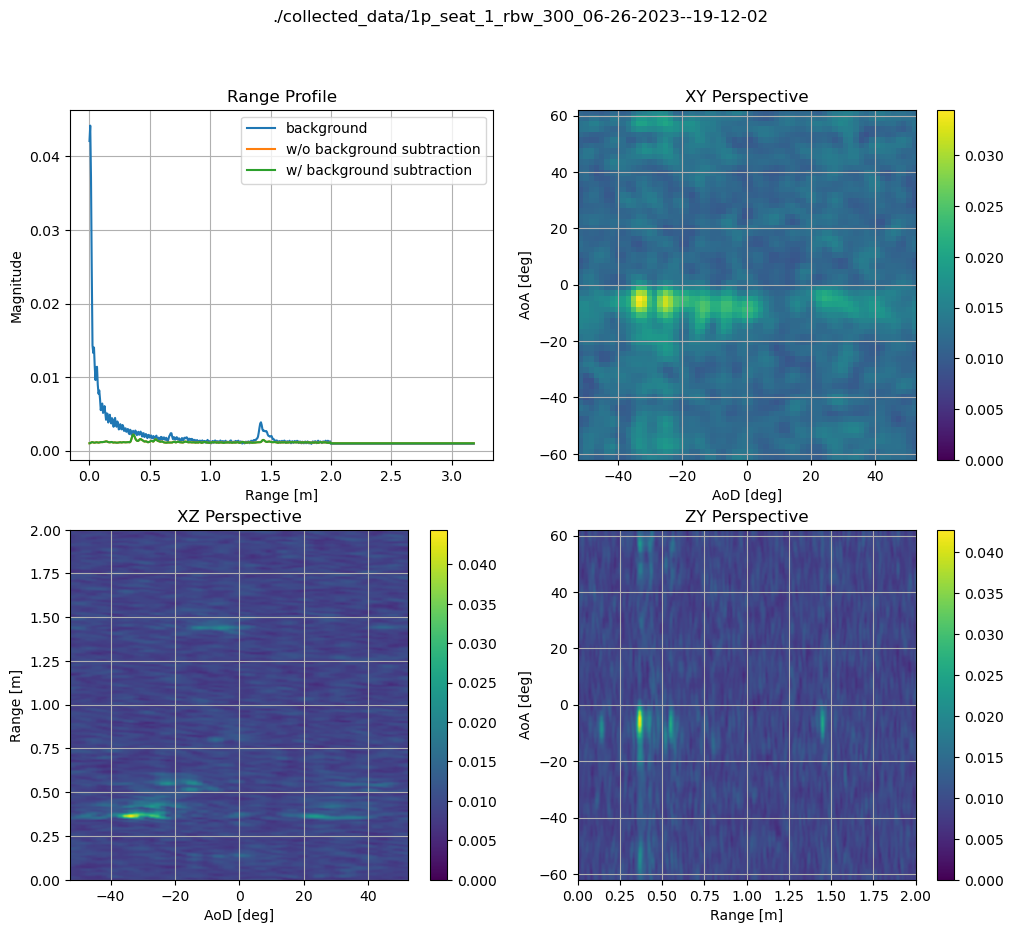

Occupancy Detection Frame Duration:  2.6452839374542236 [s]
(64, 64, 512)


In [592]:
# Record the starting time
start = time.time()
cal_frame = params['cal_arr']
cal_arr = np.mean(cal_frame, axis=0)
data_arr = []
for data in data_queue:
    cur_frame_data = data_queue[cur_frame]
    data_arr.append(np.load(os.path.join(data_queue_folder,cur_frame_data)))
rec_arr = np.mean(np.array(data_arr), axis=0)
# rec_arr = np.load(os.path.join(data_queue_folder,data_queue[cur_frame]))

# cur_frame_data = data_queue[cur_frame]
# rec_arr = np.load(os.path.join(data_queue_folder,cur_frame_data))
pro_arr = rec_arr #- cal_arr
range_profile = np.linalg.norm(pro_arr,axis=0)
# # Sort the peaks by their amplitudes in descending order and select the first 6 peaks
# range_peaks, _ = find_peaks(range_profile)
# sorted_peak_indices = np.argsort(range_profile[range_peaks])[::-1][:ntarget]
# top_range_peaks = range_peaks[sorted_peak_indices]
# # load 
range_profile = np.linalg.norm(np.fft.ifft(pro_arr, n=512, axis=1),axis=0)
range_profile[np.where(params['dist_vec']>bound)]=np.min(np.abs(range_profile))
raw_range_profile = np.linalg.norm(np.fft.ifft(rec_arr, n=512, axis=1),axis=0)
raw_range_profile[np.where(params['dist_vec']>bound)]=np.min(np.abs(raw_range_profile))
cal_range_profile = np.linalg.norm(np.fft.ifft(cal_arr, n=512, axis=1),axis=0)
cal_range_profile[np.where(params['dist_vec']>bound)]=np.min(np.abs(cal_range_profile))

pro_arr_3D = pro_arr.reshape(20,20,150)#[chosen_frame,:,:,:]
pro_arr_3D = np.fft.ifft(pro_arr_3D, n=params['range_Nfft'], axis=2)
pro_arr_3D[:,:,np.where(params['dist_vec']>bound)]=np.min(np.abs(pro_arr_3D))
# pro_arr_3D = np.roll(pro_arr_3D,shift=params['y_offset_shift'],axis=1)
# pro_arr_3D = np.roll(pro_arr_3D,shift=params['x_offset_shift'],axis=0)

# # pro_arr_3D[:,:,top_range_peaks] = pro_arr_3D[:,:,top_range_peaks]*enhance_rate


pro_arr_3D = np.fft.fft2(pro_arr_3D, s=params['angle_Nfft'], axes=[0,1])

ntarget = 100
target_range_bin = np.argsort(range_profile)[::-1][:ntarget]#params['dist_vec'][np.argmax(range_profile)]
print(params['dist_vec'][target_range_bin])


pro_arr_xy = np.linalg.norm(pro_arr_3D[:,:,target_range_bin],axis=2)#np.argmax(range_profile)])#np.linalg.norm(pro_arr_3D,axis=2)#

pro_arr_yz = np.linalg.norm(pro_arr_3D, axis=0)
pro_arr_xz = np.linalg.norm(pro_arr_3D,axis=1)



# pro_arr_yz = np.abs(np.mean(pro_arr_3D,axis=0))
# pro_arr_xy = np.abs(np.mean(pro_arr_3D,axis=2))
# pro_arr_xz = np.abs(np.mean(pro_arr_3D,axis=1))

pro_arr_xy = np.roll(pro_arr_xy,shift=params['y_offset_shift'],axis=1)
pro_arr_xy = np.roll(pro_arr_xy,shift=params['x_offset_shift'],axis=0)
pro_arr_yz = np.roll(pro_arr_yz,shift=params['y_offset_shift'],axis=0)
pro_arr_xz = np.roll(pro_arr_xz,shift=params['x_offset_shift'],axis=0)


# # Sort the peaks by their amplitudes in descending order and select the first 6 peaks
# AoD_profile = np.linalg.norm(pro_arr_xz, axis=1)
# AoD_peaks, _ = find_peaks(AoD_profile)
# sorted_peak_indices = np.argsort(AoD_profile[AoD_peaks])[::-1][:ntarget]
# top_AoD_peaks = AoD_peaks[sorted_peak_indices]
# # Sort the peaks by their amplitudes in descending order and select the first 6 peaks
# AoA_profile = np.linalg.norm(pro_arr_yz, axis=1)
# AoA_peaks, _ = find_peaks(AoA_profile)
# sorted_peak_indices = np.argsort(AoA_profile[AoA_peaks])[::-1][:ntarget]
# top_AoA_peaks = AoA_peaks[sorted_peak_indices]

# pro_arr_xy[top_AoD_peaks,:] = pro_arr_xy[top_AoD_peaks,:]*enhance_rate
# pro_arr_xy[:,top_AoA_peaks] = pro_arr_xy[:,top_AoA_peaks]*enhance_rate
# pro_arr_yz[top_AoA_peaks,:] = pro_arr_yz[top_AoA_peaks,:]*enhance_rate
# pro_arr_xz[top_AoD_peaks,:] = pro_arr_xz[top_AoD_peaks,:]*enhance_rate

extent = [np.min(params['AoD_vec']), np.max(params['AoD_vec']), np.min(params['AoA_vec']), np.max(params['AoA_vec'])]
fig = plt.figure(figsize=(12,10))
fig.suptitle(f'{data_folder}')
plt.subplot(2,2,2)
plt.title('XY Perspective')
plt.imshow((pro_arr_xy).T,origin='lower',aspect='auto', extent=extent, vmin=vmin)
plt.colorbar()
plt.xlabel('AoD [deg]')
plt.ylabel('AoA [deg]')
plt.grid()
plt.subplot(2,2,1)
plt.title('Range Profile')

# range_profile[top_range_peaks] = range_profile[top_range_peaks]*10

plt.plot(params['dist_vec'],cal_range_profile,label='background')
plt.plot(params['dist_vec'],raw_range_profile,label='w/o background subtraction')
plt.plot(params['dist_vec'],range_profile,label='w/ background subtraction')
plt.xlabel('Range [m]')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
plt.subplot(2,2,4)
plt.title('ZY Perspective')
extent = [ np.min(params['dist_vec']), bound, np.min(params['AoA_vec']), np.max(params['AoA_vec'])]
plt.imshow((pro_arr_yz[:,np.where(params['dist_vec']<=bound)].squeeze()),origin='lower',aspect='auto', extent=extent, vmin=vmin)
plt.colorbar()
plt.ylabel('AoA [deg]')
plt.xlabel('Range [m]')
plt.grid()
plt.subplot(2,2,3)
plt.title('XZ Perspective')
extent = [np.min(params['AoD_vec']), np.max(params['AoD_vec']), np.min(params['dist_vec']), bound]
plt.imshow((pro_arr_xz[:,np.where(params['dist_vec']<=bound)].squeeze()).T,origin='lower',aspect='auto', extent=extent, vmin=vmin)
plt.colorbar()
plt.xlabel('AoD [deg]')
plt.ylabel('Range [m]')
plt.grid()
plt.show()
print('Occupancy Detection Frame Duration: ',time.time()-start, '[s]')
print(pro_arr_3D.shape)

[[31 31]]
(64, 64, 512)
[-0.03542979] [-0.04009515]


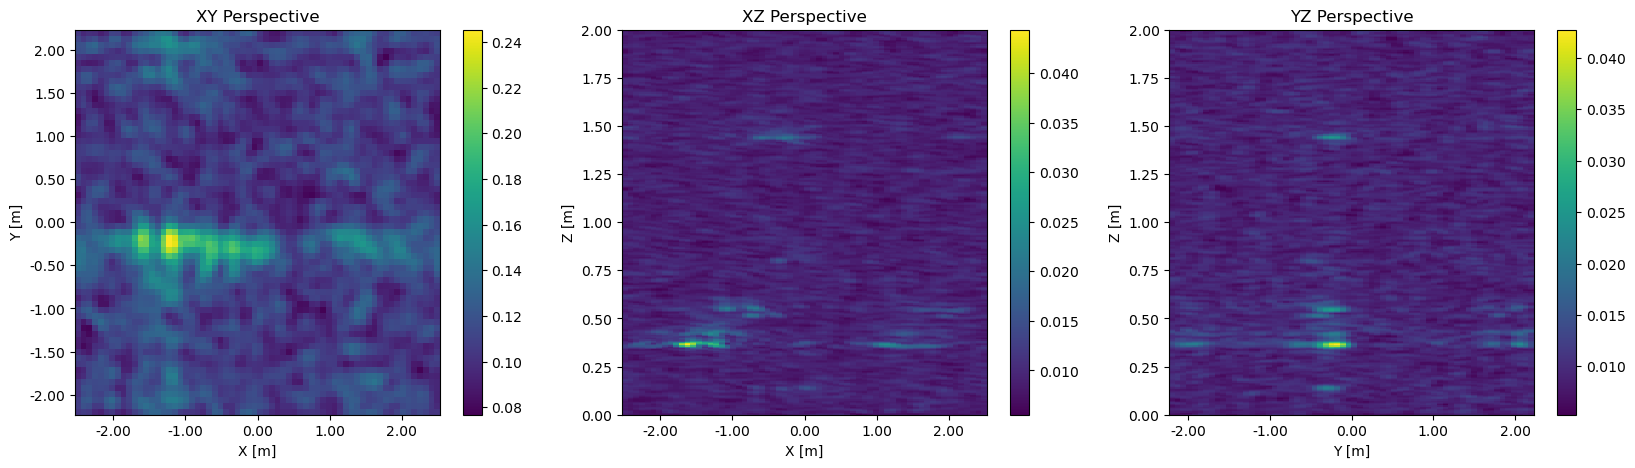

In [589]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from matplotlib.ticker import FuncFormatter

# Conversion function
def spherical_to_rectangular(r, theta, phi):
    theta = np.radians(theta)
    phi = np.radians(phi)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

# Define the coordinate values as per your actual data
theta_values = params['AoD_vec']
phi_values = params['AoA_vec']
r_values = params['dist_vec']  # replace with actual range if different

theta, phi, r = np.meshgrid(theta_values, phi_values, r_values, indexing='ij')

x, y, z = spherical_to_rectangular(r, theta, phi)

# Interpolate data to rectangular coordinates.
interpolator = RegularGridInterpolator((theta_values, phi_values, r_values), pro_arr_3D)

# Create a grid in spherical coordinates
grid_theta, grid_phi, grid_r = np.meshgrid(theta_values, phi_values, r_values, indexing='ij')

# Convert the grid to Cartesian coordinates
grid_x, grid_y, grid_z = spherical_to_rectangular(grid_r, grid_theta, grid_phi)

rect_data = interpolator((grid_theta, grid_phi, grid_r))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Create a formatter
formatter = FuncFormatter(lambda x, pos: '{:.2f}'.format(x))

# Project along the xy, xz, and yz planes
# xy_projection = np.abs(np.max(rect_data[:,:,target_range_bin], axis=2))#np.linalg.norm()#np.abs(rect_data[:,:,target_range_bin].mean(axis=2))
xz_projection = np.linalg.norm(rect_data, axis=1)#np.abs(rect_data.mean(axis=1))
yz_projection = np.linalg.norm(rect_data, axis=0)#np.abs(rect_data.mean(axis=0))
xy_projection = np.sum(np.abs(rect_data[:,:,target_range_bin]), axis=2)#np.abs(rect_data[:,:,target_range_bin].mean(axis=2))
# xz_projection = np.abs(np.sum(rect_data, axis=1))#np.abs(rect_data.mean(axis=1))
# yz_projection = np.abs(np.sum(rect_data, axis=0))#np.abs(rect_data.mean(axis=0))

xy_projection = np.roll(xy_projection,shift=params['y_offset_shift'],axis=1)
xy_projection = np.roll(xy_projection,shift=params['x_offset_shift'],axis=0)
xz_projection = np.roll(xz_projection,shift=params['x_offset_shift'],axis=0)[:,np.where(params['dist_vec']<=bound)].squeeze()
yz_projection = np.roll(yz_projection,shift=params['y_offset_shift'],axis=0)[:,np.where(params['dist_vec']<=bound)].squeeze()

peak_indices = filter_and_cluster(xy_projection, threshold=0.02, n=4)
x_axis = np.linspace(grid_x.min(), grid_x.max(), 64)
y_axis = np.linspace(grid_y.min(), grid_y.max(), 64)
z_axis = np.linspace(grid_z.min(), grid_z.max(), 512)

print(peak_indices)
print(grid_x.shape)
print(y_axis[peak_indices[:,0]], x_axis[peak_indices[:,1]])
# Plot xy projection

im = axes[0].imshow(xy_projection.T, interpolation='nearest', aspect='auto', origin='lower', extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()])
axes[0].set_title('XY Perspective')
axes[0].set_xlabel('X [m]')
axes[0].set_ylabel('Y [m]')
axes[0].xaxis.set_major_formatter(formatter)
axes[0].yaxis.set_major_formatter(formatter)
cbar = plt.colorbar(im, ax=axes[0])

# Plot xz projection
im = axes[1].imshow(xz_projection.T, interpolation='nearest', aspect='auto', origin='lower', extent=[grid_x.min(), grid_x.max(), grid_z.min(), bound])
axes[1].set_title('XZ Perspective')
axes[1].set_xlabel('X [m]')
axes[1].set_ylabel('Z [m]')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
cbar = plt.colorbar(im, ax=axes[1])


# Plot yz projection
im = axes[2].imshow(yz_projection.T, interpolation='nearest', aspect='auto', origin='lower', extent=[grid_y.min(), grid_y.max(), grid_z.min(), bound])
axes[2].set_title('YZ Perspective')
axes[2].set_xlabel('Y [m]')
axes[2].set_ylabel('Z [m]')
axes[2].xaxis.set_major_formatter(formatter)
axes[2].yaxis.set_major_formatter(formatter)
cbar = plt.colorbar(im, ax=axes[2])


# Display the figure
plt.show()

Seat #2 Occupied
Seat #4 Occupied
There are 2 in the vehicle.


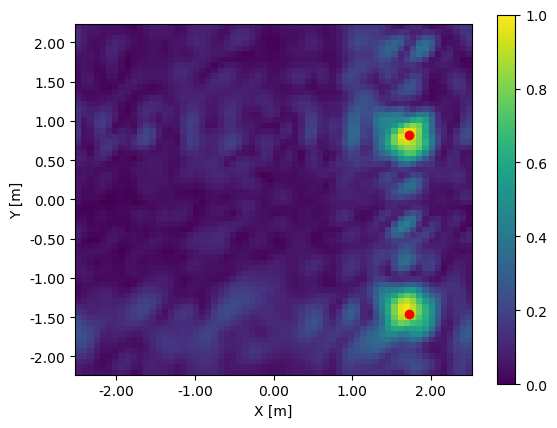

In [577]:

def count_occupants(xy_projection, grid_x, grid_y, thres=0.03, plot=True):
    x_axis = np.linspace(grid_x.min(), grid_x.max(), 64)
    y_axis = np.linspace(grid_y.min(), grid_y.max(), 64)

    occupancy_map = np.array([False, False, False, False])

    peak_indices = filter_and_cluster(normalization(xy_projection), threshold=thres, eps=10, n=4)
    peak_locs = []
    for idx in peak_indices:
        peak_locs.append((x_axis[idx[0]], y_axis[idx[1]]))
    peak_locs = np.array(peak_locs)

    if np.any(np.logical_and(peak_locs[:,0]<0, peak_locs[:,1]<0)):
        occupancy_map[0] = True
        print('Seat #1 Occupied')
    if np.any(np.logical_and(peak_locs[:,0]>=0, peak_locs[:,1]<0)):
        occupancy_map[1] = True
        print('Seat #2 Occupied')
    if np.any(np.logical_and(peak_locs[:,0]<0, peak_locs[:,1]>=0)):
        occupancy_map[2] = True
        print('Seat #3 Occupied')
    if np.any(np.logical_and(peak_locs[:,0]>=0, peak_locs[:,1]>=0)):
        occupancy_map[3] = True
        print('Seat #4 Occupied')

    n_occupants = len(occupancy_map[occupancy_map==True])
    print(f'There are {n_occupants} in the vehicle.')
    if plot:
        fig, ax = plt.subplots()
        im = ax.imshow(normalization(xy_projection).T, origin='lower', extent=[x_axis.min(), x_axis.max(), y_axis.min(), y_axis.max()])
        ax.scatter(x_axis[peak_indices[:,0]], y_axis[peak_indices[:,1]], color='r')
        cbar = plt.colorbar(im, ax=ax)
        ax.set_xlabel('X [m]')
        ax.set_ylabel('Y [m]')
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
    return n_occupants, occupancy_map

n_occupants, _ = count_occupants(xy_projection, grid_x, grid_y, thres=0.4)

(10, 400, 150)
(32, 512)


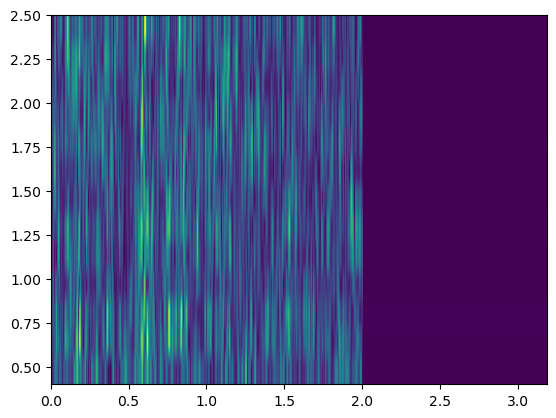

In [578]:
doppler_window_size = 10
data_arr = []
for data in data_queue:
    cur_frame_data = data
    data_arr.append(np.load(os.path.join(data_queue_folder,cur_frame_data)))

data_arr = np.stack(data_arr, axis=0)[:doppler_window_size,:,:]
print(data_arr.shape)
range_arr = np.real(np.fft.ifft(data_arr, n=params['range_Nfft'], axis=2))
range_arr = np.mean(range_arr,axis=1)
range_arr[:,np.where(params['dist_vec']>2)] = np.mean(range_arr)
range_doppler = np.abs(np.fft.fft(range_arr, n=params['doppler_Nfft'], axis=0))
print(range_doppler.shape)
range_doppler_range = np.intersect1d(np.where(params['doppler_freq']>=0.4)[0],np.where(params['doppler_freq']<2.5)[0])
plt.figure()
extent = [np.min(params['dist_vec']), np.max(params['dist_vec']), 0.4, 2.5]
plt.imshow(range_doppler[range_doppler_range,:], aspect='auto', origin='lower', extent=extent)
